In [6]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scypy (from versions: none)
ERROR: No matching distribution found for scypy


# Data Understanding

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_booking.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nBasic Information:")
print(df.info())
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum().sort_values(ascending=False))
# Check for duplicates
df.duplicated().sum()
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (119390, 36)

Columns: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119

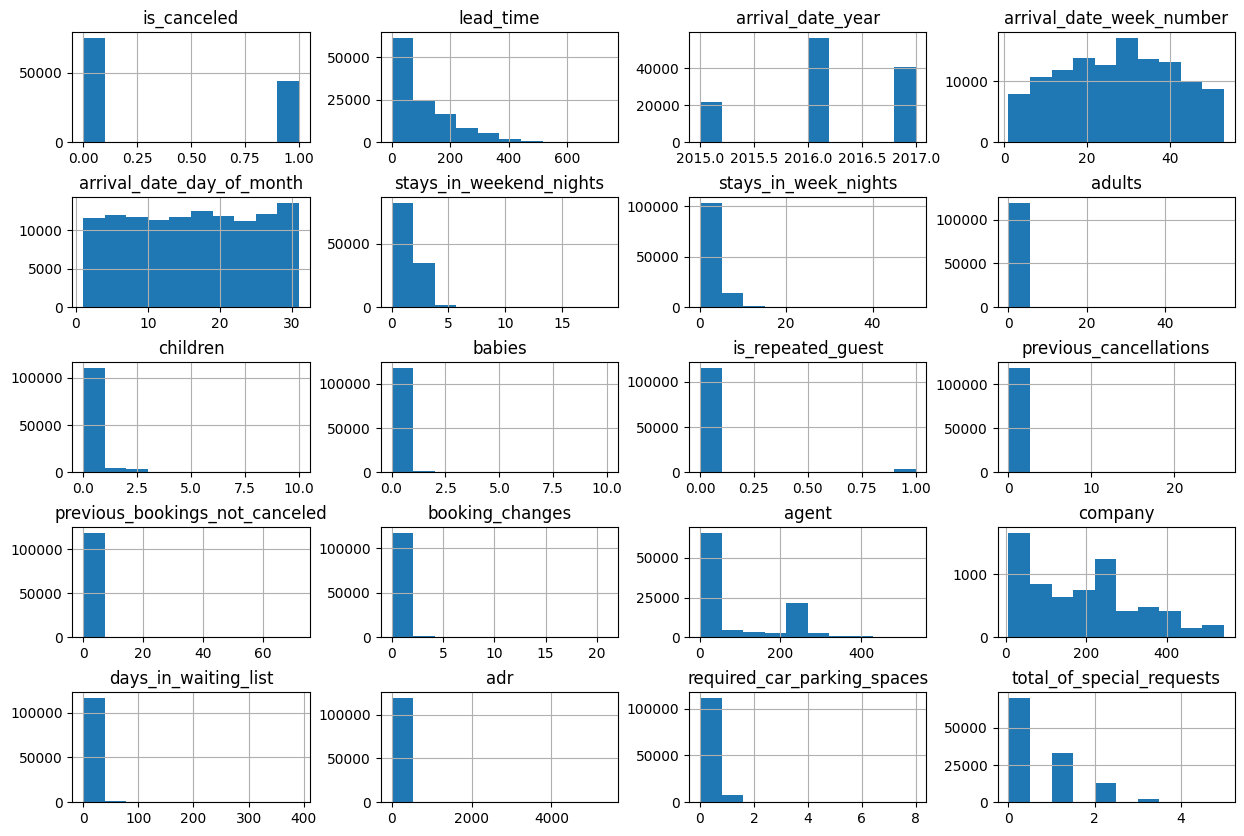

In [8]:
# Plot the duistribution of the numerical features
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.show()

In [9]:
# Remove sensitive information
columns_to_drop = ['name', 'email', 'phone-number', 'credit_card']
df = df.drop(columns=columns_to_drop)

In [10]:
# Select categorical features
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [11]:
# Remove reservation_status_date and country
categorical_features.remove('reservation_status_date')
categorical_features.remove('country')

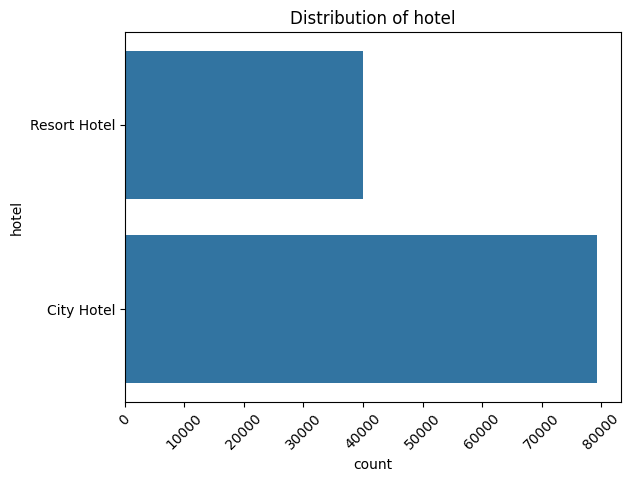

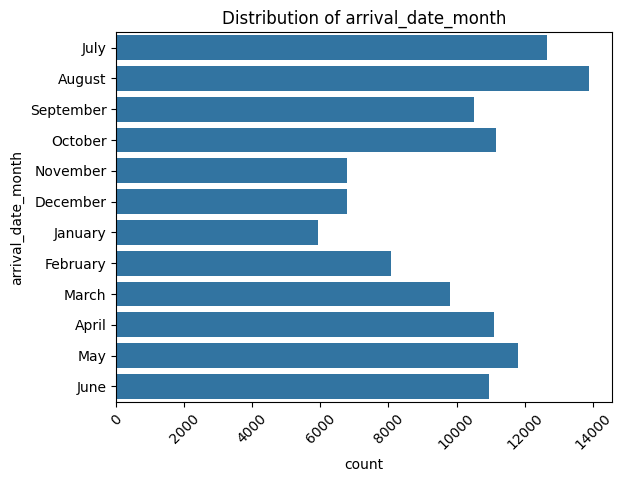

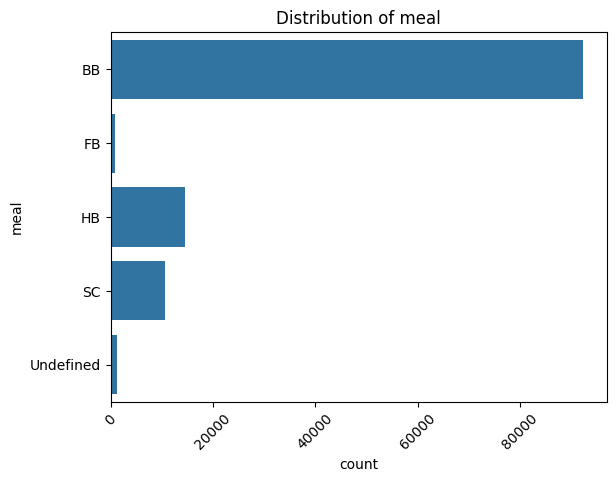

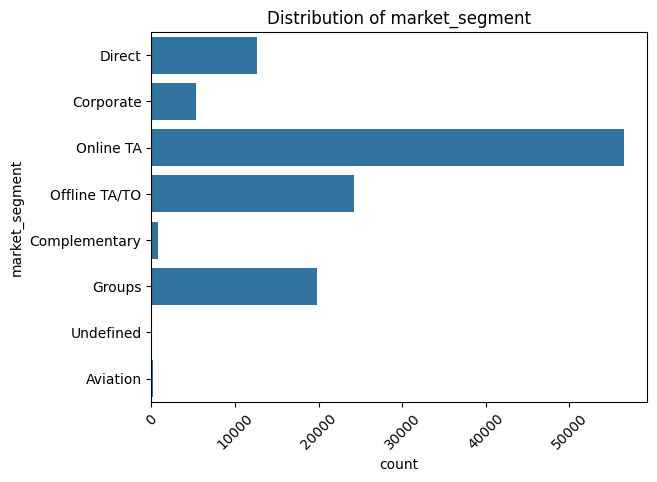

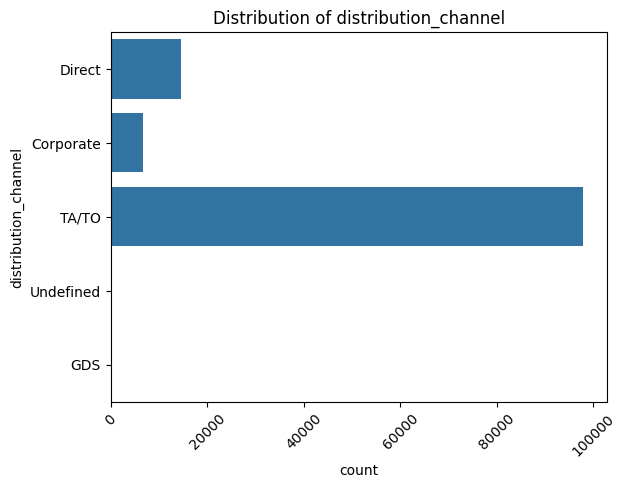

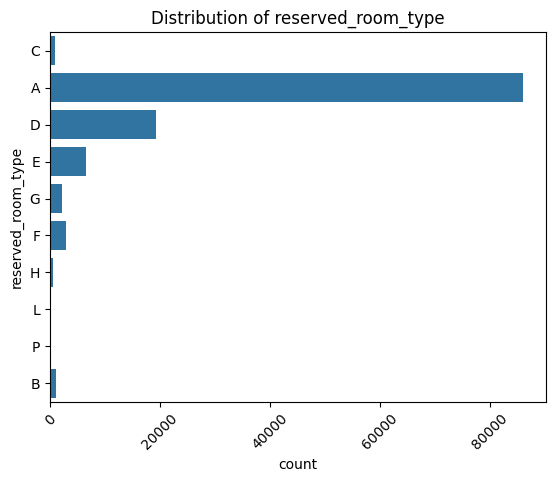

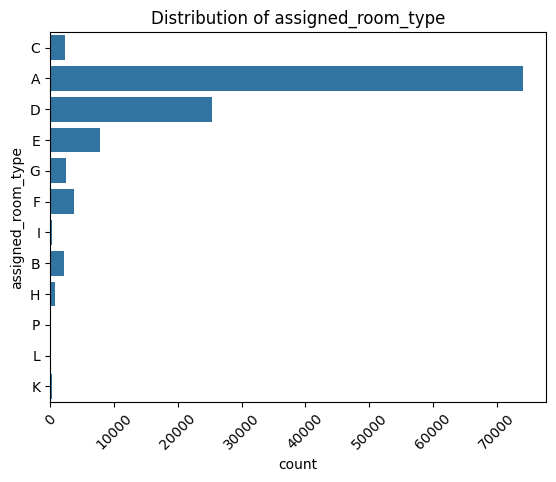

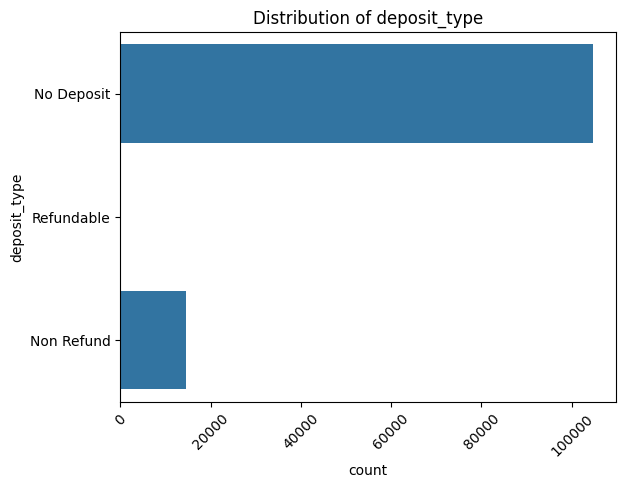

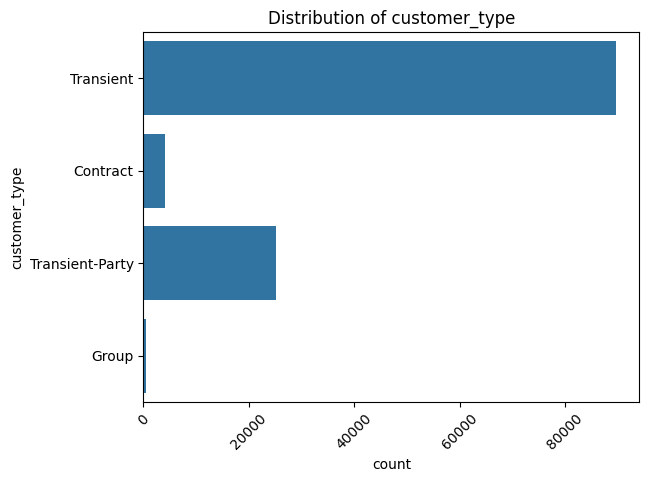

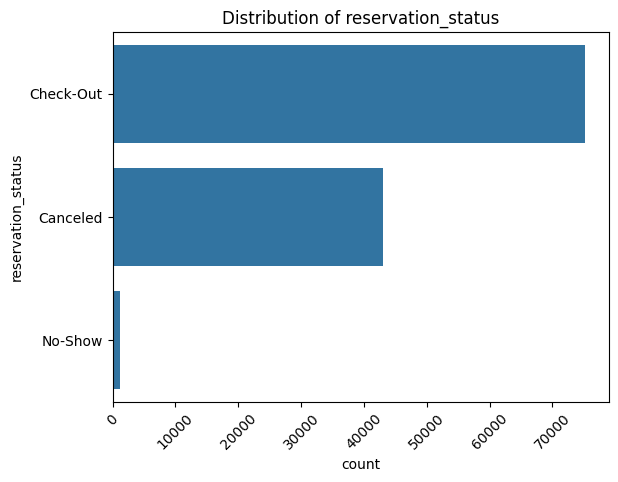

In [12]:
# Plot the distribution of the categorical features
for feature in categorical_features:
    sns.countplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

Overall cancellation rate: 37.04%


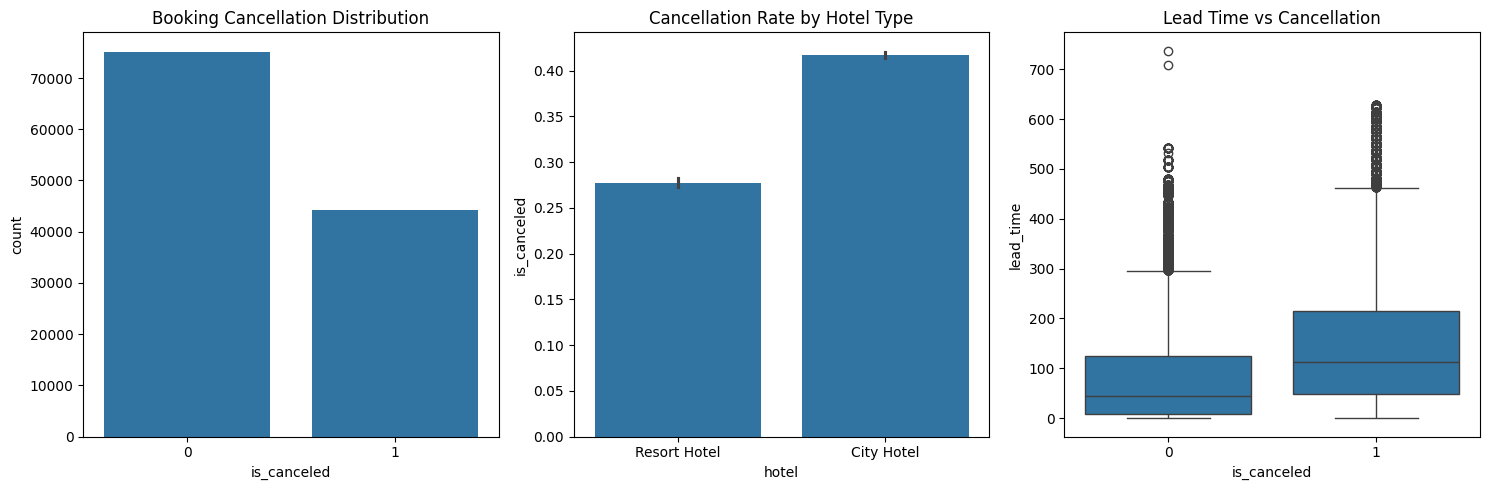


Cancellation rates by market segment:
market_segment
Undefined        1.000000
Groups           0.610620
Online TA        0.367211
Offline TA/TO    0.343160
Aviation         0.219409
Corporate        0.187347
Direct           0.153419
Complementary    0.130552
Name: is_canceled, dtype: float64

Average lead time for cancelled vs non-cancelled bookings:
is_canceled
0     79.984687
1    144.848815
Name: lead_time, dtype: float64


In [13]:
# Basic statistics about cancellations
cancellation_rate = df['is_canceled'].mean() * 100
print(f"Overall cancellation rate: {cancellation_rate:.2f}%")

# Create some initial visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Cancellation distribution
plt.subplot(131)
sns.countplot(data=df, x='is_canceled')
plt.title('Booking Cancellation Distribution')

# Plot 2: Cancellation rate by hotel type
plt.subplot(132)
sns.barplot(data=df, x='hotel', y='is_canceled')
plt.title('Cancellation Rate by Hotel Type')

# Plot 3: Lead time distribution by cancellation status
plt.subplot(133)
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('Lead Time vs Cancellation')

plt.tight_layout()
plt.show()

# Additional insights
print("\nCancellation rates by market segment:")
print(df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False))

print("\nAverage lead time for cancelled vs non-cancelled bookings:")
print(df.groupby('is_canceled')['lead_time'].mean())


Correlations with cancellation:
lead_time: 0.293
total_of_special_requests: -0.235
required_car_parking_spaces: -0.195
previous_cancellations: 0.110
previous_bookings_not_canceled: -0.057
adr: 0.048
total_guests: 0.047
total_nights: 0.018

Cancellation rate by deposit type:
deposit_type
Non Refund    0.993624
No Deposit    0.283770
Refundable    0.222222
Name: is_canceled, dtype: float64

Cancellation rate by customer type:
customer_type
Transient          0.407463
Contract           0.309617
Transient-Party    0.254299
Group              0.102253
Name: is_canceled, dtype: float64


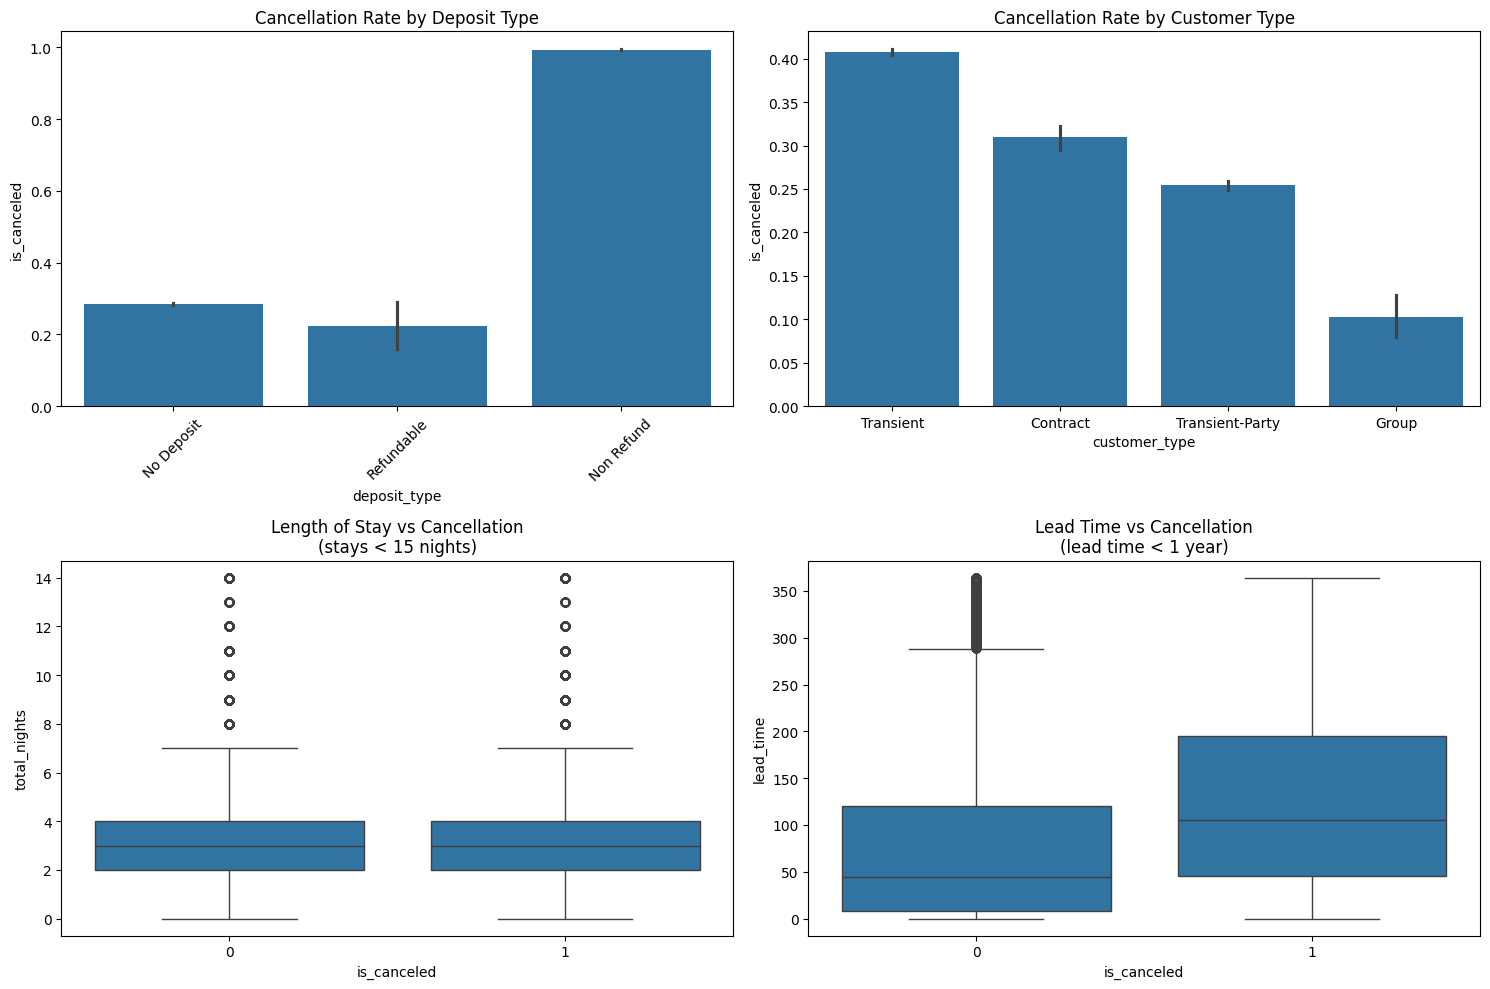

In [14]:
# Create more detailed features
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guests'] = df['adults'] + df['children'].fillna(0) + df['babies']

# Calculate correlations correctly
numerical_cols = ['lead_time', 'total_nights', 'total_guests', 'adr', 
                 'required_car_parking_spaces', 'total_of_special_requests',
                 'previous_cancellations', 'previous_bookings_not_canceled']

correlations = {col: df['is_canceled'].corr(df[col]) for col in numerical_cols}
print("\nCorrelations with cancellation:")
for col, corr in sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{col}: {corr:.3f}")

# Print deposit type and customer type statistics
print("\nCancellation rate by deposit type:")
print(df.groupby('deposit_type')['is_canceled'].mean().sort_values(ascending=False))

print("\nCancellation rate by customer type:")
print(df.groupby('customer_type')['is_canceled'].mean().sort_values(ascending=False))

# Visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Cancellation rate by deposit type
plt.subplot(221)
sns.barplot(data=df, x='deposit_type', y='is_canceled')
plt.title('Cancellation Rate by Deposit Type')
plt.xticks(rotation=45)

# Plot 2: Cancellation rate by customer type
plt.subplot(222)
sns.barplot(data=df, x='customer_type', y='is_canceled')
plt.title('Cancellation Rate by Customer Type')

# Plot 3: Total nights distribution for cancelled vs non-cancelled
plt.subplot(223)
sns.boxplot(data=df[df['total_nights'] < 15], x='is_canceled', y='total_nights')
plt.title('Length of Stay vs Cancellation\n(stays < 15 nights)')

# Plot 4: Lead time distribution by cancellation
plt.subplot(224)
sns.boxplot(data=df[df['lead_time'] < 365], x='is_canceled', y='lead_time')
plt.title('Lead Time vs Cancellation\n(lead time < 1 year)')

plt.tight_layout()
plt.show()

# Data Preparation

In [15]:
# Create feature engineering pipeline
def engineer_features(df):
    # Create copy to avoid modifying original
    df_proc = df.copy()
    
    # Temporal features
    df_proc['arrival_date'] = pd.to_datetime(df_proc['arrival_date_year'].astype(str) + '-' + 
                                           df_proc['arrival_date_month'] + '-' + 
                                           df_proc['arrival_date_day_of_month'].astype(str))
    df_proc['booking_date'] = df_proc['arrival_date'] - pd.to_timedelta(df_proc['lead_time'], unit='D')
    df_proc['is_weekend_arrival'] = df_proc['arrival_date'].dt.dayofweek >= 5
    
    # Aggregate features
    df_proc['total_nights'] = df_proc['stays_in_weekend_nights'] + df_proc['stays_in_week_nights']
    df_proc['total_guests'] = df_proc['adults'] + df_proc['children'].fillna(0) + df_proc['babies']
    
    # Room type match
    df_proc['got_desired_room'] = (df_proc['reserved_room_type'] == df_proc['assigned_room_type']).astype(int)
    
    # Season feature
    conditions = [
        df_proc['arrival_date_month'].isin(['December', 'January', 'February']),
        df_proc['arrival_date_month'].isin(['March', 'April', 'May']),
        df_proc['arrival_date_month'].isin(['June', 'July', 'August']),
        df_proc['arrival_date_month'].isin(['September', 'October', 'November'])
    ]
    choices = ['winter', 'spring', 'summer', 'fall']
    df_proc['season'] = np.select(conditions, choices, default='unknown')
    
    # Drop unnecessary columns
    cols_to_drop = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
                    'arrival_date_week_number', 'arrival_date', 'reservation_status', 
                    'reservation_status_date']
    
    return df_proc.drop(columns=cols_to_drop)

# Handle missing values
def handle_missing_values(df):
    df_clean = df.copy()
    
    # Fill missing values
    df_clean['children'] = df_clean['children'].fillna(0)
    df_clean['country'] = df_clean['country'].fillna('Unknown')
    df_clean['agent'] = df_clean['agent'].fillna(0)
    df_clean['company'] = df_clean['company'].fillna(0)
    
    return df_clean

# Run preprocessing
print("Starting preprocessing...")
df_processed = engineer_features(df)
df_processed = handle_missing_values(df_processed)

# Show resulting features
print("\nProcessed features:")
print(df_processed.columns.tolist())

# Show sample of engineered features
print("\nSample of engineered features:")
print(df_processed[['booking_date', 'is_weekend_arrival', 'total_nights', 
                   'total_guests', 'got_desired_room', 'season']].head())

Starting preprocessing...

Processed features:
['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights', 'total_guests', 'booking_date', 'is_weekend_arrival', 'got_desired_room', 'season']

Sample of engineered features:
  booking_date  is_weekend_arrival  total_nights  total_guests  \
0   2014-07-24               False             0           2.0   
1   2013-06-24               False             0           2.0   
2   2015-06-24               False             1           1.0   
3   2015-06-18               False             1           1.0   
4   2015-06-17       

In [16]:
# Check if variables that are not supposed to have zero values have zero values
print("Number of rows where total_guests is 0:", (df_processed['total_guests'] == 0).sum())
print("Number of rows where total_nights is 0:", (df_processed['total_nights'] == 0).sum())

Number of rows where total_guests is 0: 180
Number of rows where total_nights is 0: 715


is_canceled      0      1  total  cancellation_rate
season                                             
fall         17978  10484  28462           0.368351
spring       20324  12350  32674           0.377976
summer       22961  14516  37477           0.387331
winter       13903   6874  20777           0.330847


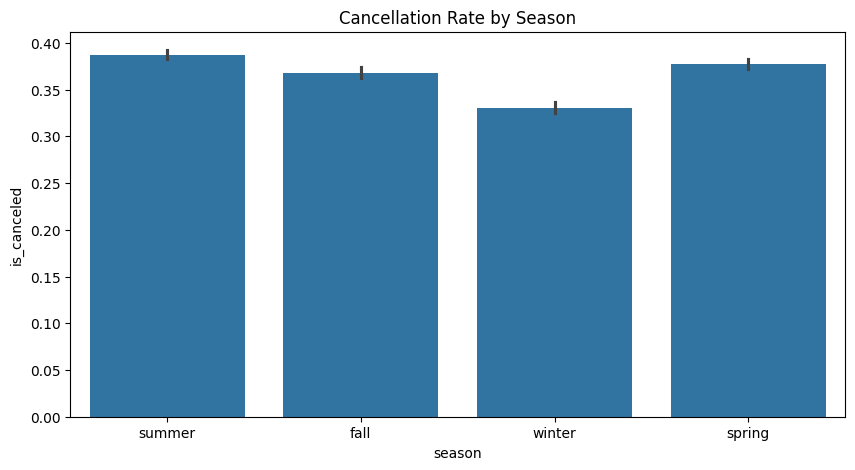

In [17]:
# Check cancellation rate of bookings by season
df_season = df_processed.groupby(['season', 'is_canceled']).size().unstack()
df_season['total'] = df_season.sum(axis=1)
df_season['cancellation_rate'] = df_season[1] / df_season['total']
print(df_season)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_processed, x='season', y='is_canceled')
plt.title('Cancellation Rate by Season')
plt.show()

## Feature Selection

Since our target variable, even though numerical, is categorical, the following feature selection algorithms will be performed:
- Chi: to analyse the correlation of the target and the categorical features;
- ANOVA: to analyse the correlation of the target and the continuous features; 
- Lasso

### Chi

In [18]:
categorical_cols = df_processed.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'is_weekend_arrival',
 'season']

In [19]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [20]:
FunctionChisq(inpData=df_processed, TargetVariable='is_canceled', CategoricalVariablesList=categorical_cols)

hotel is correlated with is_canceled | P-Value: 0.0
meal is correlated with is_canceled | P-Value: 1.3212351959124216e-64
country is correlated with is_canceled | P-Value: 0.0
market_segment is correlated with is_canceled | P-Value: 0.0
distribution_channel is correlated with is_canceled | P-Value: 0.0
reserved_room_type is correlated with is_canceled | P-Value: 1.121956218424043e-133
assigned_room_type is correlated with is_canceled | P-Value: 0.0
deposit_type is correlated with is_canceled | P-Value: 0.0
customer_type is correlated with is_canceled | P-Value: 0.0
is_weekend_arrival is correlated with is_canceled | P-Value: 0.0016971348065030233
season is correlated with is_canceled | P-Value: 8.334882386828892e-42


['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'is_weekend_arrival',
 'season']

According to Chi, all of the categorical features are correlated to the target. Here are the categorical features sorted from highest P-value to lowest:
- is_weekend_arrival;
- season;
- meal;
- reserved_room_type;
- distribution_channel (after this point all the features had P-value 0 so they are not in any particular order);
- market_segment;
- hotel;
- country;
- assigned_room_type;
- deposit_type;
- customer_type.


### ANOVA

In [21]:

def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [22]:
# Select numerical columns
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('is_canceled')
numerical_cols

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_nights',
 'total_guests']

In [23]:
FunctionAnova(inpData=df_processed, TargetVariable='is_canceled', ContinuousPredictorList=numerical_cols)

##### ANOVA Results ##### 

lead_time is correlated with is_canceled | P-Value: 0.0
stays_in_weekend_nights is NOT correlated with is_canceled | P-Value: 0.5360068238991778
stays_in_week_nights is correlated with is_canceled | P-Value: 1.1473295419809132e-17
adults is correlated with is_canceled | P-Value: 1.0785654472600046e-95
children is NOT correlated with is_canceled | P-Value: 0.08183043560728301
babies is correlated with is_canceled | P-Value: 2.923023513069626e-29
is_repeated_guest is correlated with is_canceled | P-Value: 2.3127064758837656e-189
previous_cancellations is correlated with is_canceled | P-Value: 8.93266e-319
previous_bookings_not_canceled is correlated with is_canceled | P-Value: 1.4894651920729486e-87
booking_changes is correlated with is_canceled | P-Value: 0.0
agent is correlated with is_canceled | P-Value: 3.208843320643114e-58
company is correlated with is_canceled | P-Value: 1.7891492568338282e-181
days_in_waiting_list is correlated with is_canceled | P-Val

['lead_time',
 'stays_in_week_nights',
 'adults',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_nights',
 'total_guests']

According to ANOVA, 'children' and 'stays_in_weekend_nights' are not correlated to the target variable.

### Lasso

In [24]:
# Select binary features
binary_feaures = df_processed.nunique()[df_processed.nunique() == 2].keys().tolist()
binary_feaures

['hotel',
 'is_canceled',
 'is_repeated_guest',
 'is_weekend_arrival',
 'got_desired_room']

Only the 'hotel' feature is categorical so this is the only one that needs the Binary Encoding

In [25]:
# Replace hotel with 0 and 1
df_processed['hotel'] = df_processed['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})

In [26]:
df_processed_encoded = pd.get_dummies(df_processed, drop_first=True)
df_processed_encoded.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,season_spring,season_summer,season_winter
0,0,0,342,0,0,2,0.0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
1,0,0,737,0,0,2,0.0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
2,0,0,7,0,1,1,0.0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
3,0,0,13,0,1,1,0.0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
4,0,0,14,0,2,2,0.0,0,0,0,...,False,False,False,False,False,True,False,False,True,False


In [27]:
# Drop booking_date
df_processed_encoded = df_processed_encoded.drop(columns=['booking_date'])

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_processed_encoded_scaled = scaler.fit_transform(df_processed_encoded)
df_processed_encoded_scaled = pd.DataFrame(df_processed_encoded_scaled, columns=df_processed_encoded.columns)
df_processed_encoded_scaled

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,season_spring,season_summer,season_winter
0,0.0,0.0,0.464043,0.000000,0.00,0.036364,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.000000,0.000000,0.00,0.036364,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.009498,0.000000,0.02,0.018182,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.017639,0.000000,0.02,0.018182,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.018996,0.000000,0.04,0.036364,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1.0,0.0,0.031208,0.105263,0.10,0.036364,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
119386,1.0,0.0,0.138399,0.105263,0.10,0.054545,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
119387,1.0,0.0,0.046133,0.105263,0.10,0.036364,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
119388,1.0,0.0,0.147897,0.105263,0.10,0.036364,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def lasso_regularization(df):

    X = df.iloc[:,:-1]          
    y = df.iloc[:,-1] 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    scaler.fit(X_train)

    # fit a Logistic Regression model and feature selection altogether 
    # select the Lasso (l1) penalty.
    # The selectFromModel class from sklearn, selects the features which coefficients are non-zero

    sel_ = SelectFromModel(LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

    sel_.fit(scaler.transform(X_train), y_train)

    # make a list with the selected features
    selected_feat = X_train.columns[(sel_.get_support())]
    
    print("Number of features which coefficient was shrank to zero: ", np.sum(sel_.estimator_.coef_ == 0))
    # identify the removed features like this:
    removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
    print(removed_feats) 

    # transform data
    X_lasso = pd.DataFrame(sel_.transform(scaler.transform(X)), columns=selected_feat)
    
    return X_lasso

In [30]:
lasso_regularization(df_processed_encoded_scaled)

Number of features which coefficient was shrank to zero:  47
Index(['adults', 'total_nights', 'country_AIA', 'country_ATF', 'country_BDI',
       'country_BEN', 'country_BHR', 'country_BHS', 'country_BOL',
       'country_BRB', 'country_BWA', 'country_CYM', 'country_DJI',
       'country_DMA', 'country_DNK', 'country_ETH', 'country_FJI',
       'country_FRA', 'country_FRO', 'country_GEO', 'country_GUY',
       'country_IMN', 'country_KHM', 'country_KIR', 'country_LAO',
       'country_MLI', 'country_MNE', 'country_MRT', 'country_MYT',
       'country_NAM', 'country_NCL', 'country_NIC', 'country_NPL',
       'country_PLW', 'country_PRY', 'country_SDN', 'country_SLE',
       'country_SLV', 'country_STP', 'country_SYC', 'country_TJK',
       'country_UMI', 'country_VGB', 'market_segment_Undefined',
       'distribution_channel_Undefined', 'reserved_room_type_L',
       'assigned_room_type_L'],
      dtype='object')


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,season_spring,season_summer
0,-1.410203,-0.766899,2.236052,-0.928436,-1.309092,-0.260635,-0.080168,-0.181006,-0.102893,-0.09261,...,-0.055661,-0.048809,-0.01121,-0.373828,-0.035909,-0.069945,0.575609,-0.516385,-0.614203,1.479184
1,-1.410203,-0.766899,5.944339,-0.928436,-1.309092,-0.260635,-0.080168,-0.181006,-0.102893,-0.09261,...,-0.055661,-0.048809,-0.01121,-0.373828,-0.035909,-0.069945,0.575609,-0.516385,-0.614203,1.479184
2,-1.410203,-0.766899,-0.908951,-0.928436,-0.785389,-0.260635,-0.080168,-0.181006,-0.102893,-0.09261,...,-0.055661,-0.048809,-0.01121,-0.373828,-0.035909,-0.069945,0.575609,-0.516385,-0.614203,1.479184
3,-1.410203,-0.766899,-0.852623,-0.928436,-0.785389,-0.260635,-0.080168,-0.181006,-0.102893,-0.09261,...,-0.055661,-0.048809,-0.01121,-0.373828,-0.035909,-0.069945,0.575609,-0.516385,-0.614203,1.479184
4,-1.410203,-0.766899,-0.843235,-0.928436,-0.261687,-0.260635,-0.080168,-0.181006,-0.102893,-0.09261,...,-0.055661,-0.048809,-0.01121,-0.373828,-0.035909,-0.069945,0.575609,-0.516385,-0.614203,1.479184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.709118,-0.766899,-0.758742,1.073184,1.309421,-0.260635,-0.080168,-0.181006,-0.102893,-0.09261,...,-0.055661,-0.048809,-0.01121,-0.373828,-0.035909,-0.069945,0.575609,-0.516385,-0.614203,1.479184
119386,0.709118,-0.766899,-0.017085,1.073184,1.309421,-0.260635,-0.080168,-0.181006,-0.102893,-0.09261,...,-0.055661,-0.048809,-0.01121,-0.373828,-0.035909,-0.069945,0.575609,-0.516385,-0.614203,1.479184
119387,0.709118,-0.766899,-0.655473,1.073184,1.309421,-0.260635,-0.080168,-0.181006,-0.102893,-0.09261,...,-0.055661,-0.048809,-0.01121,-0.373828,-0.035909,-0.069945,0.575609,-0.516385,-0.614203,1.479184
119388,0.709118,-0.766899,0.048632,1.073184,1.309421,-0.260635,-0.080168,-0.181006,-0.102893,-0.09261,...,-0.055661,-0.048809,-0.01121,-0.373828,-0.035909,-0.069945,0.575609,-0.516385,-0.614203,1.479184


### Feature importance from decision trees (Random Forest algorithm) 

Training model...

Making predictions...


c:\Users\tiago\OneDrive\Documentos\uni\mei\.conda\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\tiago\OneDrive\Documentos\uni\mei\.conda\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     14907
           1       0.89      0.81      0.85      8971

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878


ROC-AUC Score: 0.957


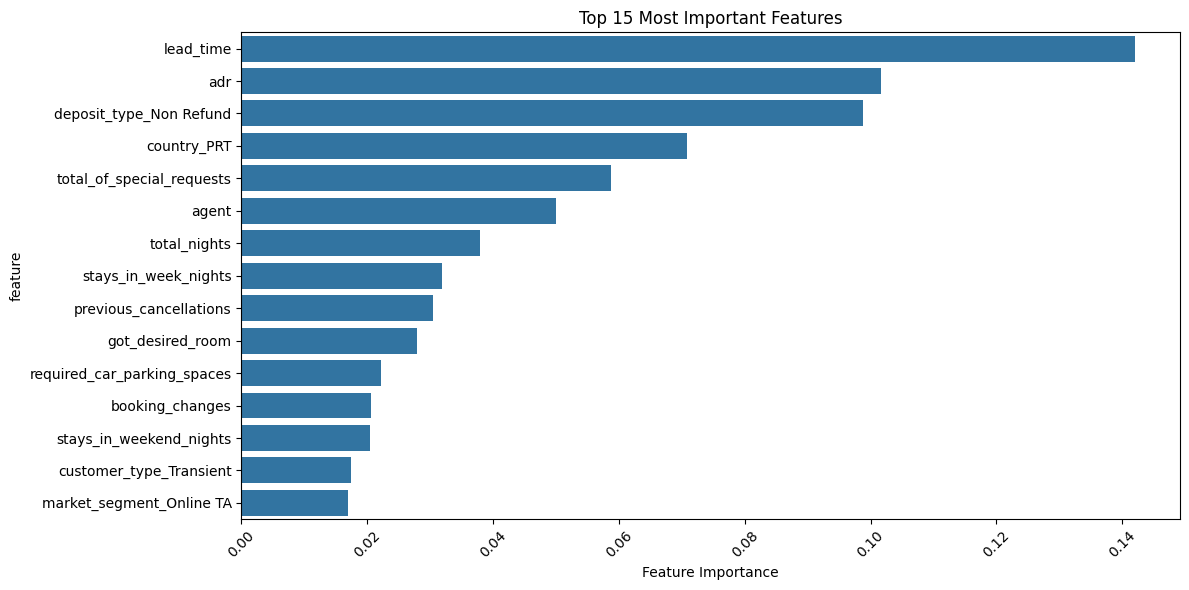


Top 10 Most Important Features:
                       feature  importance
0                    lead_time    0.142090
13                         adr    0.101588
229    deposit_type_Non Refund    0.098744
156                country_PRT    0.070837
15   total_of_special_requests    0.058801
10                       agent    0.050074
16                total_nights    0.037887
2         stays_in_week_nights    0.031807
7       previous_cancellations    0.030475
19            got_desired_room    0.027979


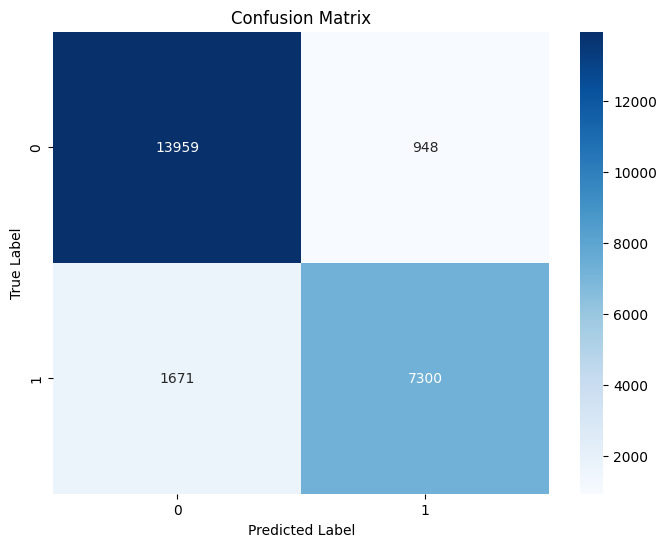


Model Performance Summary:
Total samples in test set: 23878
Correct predictions: 21259
Accuracy: 0.890

Detailed Metrics:
True Negatives (Correctly predicted non-cancellations): 13959
False Positives (Incorrectly predicted cancellations): 948
False Negatives (Missed cancellations): 1671
True Positives (Correctly predicted cancellations): 7300
Precision (Of predicted cancellations, what fraction were actual cancellations): 0.885
Recall (Of actual cancellations, what fraction were caught): 0.814


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Separate features and target
X = df_processed.drop('is_canceled', axis=1)
y = df_processed['is_canceled']

# Split categorical and numerical columns
categorical_features = ['hotel', 'meal', 'country', 'market_segment', 
                       'distribution_channel', 'reserved_room_type',
                       'assigned_room_type', 'deposit_type', 'customer_type']
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                     'adults', 'children', 'babies', 'is_repeated_guest',
                     'previous_cancellations', 'previous_bookings_not_canceled',
                     'booking_changes', 'agent', 'company', 'days_in_waiting_list',
                     'adr', 'required_car_parking_spaces', 'total_of_special_requests',
                     'total_nights', 'total_guests', 'is_weekend_arrival', 'got_desired_room']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create and train the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
print("Training model...")
model.fit(X_train, y_train)

# Make predictions
print("\nMaking predictions...")
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Print model performance
print("\nModel Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")

# Get feature names after one-hot encoding
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(categorical_feature_names)

# Calculate feature importance
feature_importance = model.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print some additional insights
print("\nModel Performance Summary:")
print(f"Total samples in test set: {len(y_test)}")
print(f"Correct predictions: {(y_pred == y_test).sum()}")
print(f"Accuracy: {(y_pred == y_test).mean():.3f}")

# Calculate class-wise metrics
tn, fp, fn, tp = cm.ravel()
print(f"\nDetailed Metrics:")
print(f"True Negatives (Correctly predicted non-cancellations): {tn}")
print(f"False Positives (Incorrectly predicted cancellations): {fp}")
print(f"False Negatives (Missed cancellations): {fn}")
print(f"True Positives (Correctly predicted cancellations): {tp}")
print(f"Precision (Of predicted cancellations, what fraction were actual cancellations): {tp/(tp+fp):.3f}")
print(f"Recall (Of actual cancellations, what fraction were caught): {tp/(tp+fn):.3f}")

# Modeling

# Model Evaluation